In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge line

The Pacific Dataviz Challenge is a competition for all—of any age, background or skillset—that encourages storytelling, design, innovation and technical skill in the visualisation of Pacific data.

Participants, individually or as a team, are invited to create data visualisations that highlight important issues or opportunities facing the Pacific region.

Your submission could be an infographic, animation, dashboard, web app, poster, PDF report, drawing—almost anything you can imagine and create.

# Theme (taken directly from site)

This year’s theme ‘Blue Pacific 2050’ references the long-term approach to working together as a region, the 2050 Strategy for the Blue Pacific Continent.

A shared vision, it shaped by and for Pacific peoples, cultures, and their deep connection to the land and ocean.

The Strategy focuses on seven key areas:

1. Political Leadership and Regionalism
2. People-Centred Development
3. Peace and Security
4. Resources and Economic Development
5. Climate Change and Disasters
6. Ocean and Environment
7. Technology and Connectivity.

# Exploration

Note that all datasets have been renamed from their original downloaded file names for ease-of-use

__Mapping__

- _Political Leadership and Regionalism_: `bp2050_pol_leadership.csv`
- _People-Centred Development_: `bp2050_ppl_centered_dev.csv`
- _Peace and Security_: `bp2050_peace_and_sec.csv`
- _Resources and Economic Development_: `bp2050_economic_dev.csv`
- _Climate Change and Disasters_: `bp2050_climate_change.csv`
- _Ocean and Environment_: `bp2050_ocean_and_env.csv`
- _Technology and Connectivity_: `bp2050_tech_and_conn.csv`

In [2]:
all_df = pd.read_csv("../data/bp2050_all.csv")
pol_df = pd.read_csv("../data/bp2050_pol_leadership.csv")
ppl_df = pd.read_csv("../data/bp2050_ppl_centered_dev.csv")
peace_df = pd.read_csv("../data/bp2050_peace_and_sec.csv")
eco_df = pd.read_csv("../data/bp2050_economic_dev.csv")
clim_df = pd.read_csv("../data/bp2050_climate_change.csv")
ocean_df = pd.read_csv("../data/bp2050_ocean_and_env.csv")
tech_df = pd.read_csv("../data/bp2050_tech_and_conn.csv")

dfs = [ # excluding all
    pol_df, # 2753 data-points
    ppl_df, # 12000 data-points
    peace_df, # 9 data-points
    eco_df, # 4533 data-points
    clim_df, # 2949 data-points
    ocean_df, # 978 data-points
    tech_df # 1731 data-points
]

## Investigative notes

- There's a mapping which I can't fully find on the site but it's much easier to understand and navigate in tandem with the datahubs UI
- Columns like `DATAFLOW` and `FREQ` probably aren't relevant for this shorter analysis and challenge

### Noted Mappings:

`_T` indicates Total and `_Z` means "Not stated" (or the equivalent)

- `GEO_PICT`: are the individual Pacific Island Countries and Territories
    - 'FM': Micronesia
    - 'TV': Tuvalu
    - 'NR': Nauru
    - 'VU': Vanuatu
    - 'PW':
    - 'TO': Tonga
    - 'MH': Mashall Islands
    - 'CK': Cook Islands
    - 'PG': Papua New Guinea
    - 'WS':
    - 'KI': Kiribati
    - 'SB':
    - 'FJ': Fiji
    - 'PF': French Polynesia
    - 'NU': Niue
    - 'NC': New caledonia
- `SEX`:
    - '_T': Total
    - 'F': Female
    - 'M': Male
- `AGE`: Provided as ranges (`Y` = start of range and `T` = end of range)
- `URBANIZATION`:
    - '_T': Total
    - 'U': Urban
    - 'R': Rural
- `INCOME`: Denotes quintiles, bottom 40\%, and top 60\%
- `EDUCATION`: Specific range based on entry
- `OCCUPATION`: Specific mapping based on entry
- `COMPOSITE_BREAKDOWN`: Special groups based on theme

In [3]:
for df in dfs:
    print(len(df))

2753
12000
9
4533
2949
978
1731


# Area of Interest

Discussion around safe water, sanitation, and hygeine at the national level

Indicator mappings (gathered via manual checking and validation)

- `SH_H2O_IMPR`: Population using an improved drinking water source
- `SH_MED_DEN`: Health worker density
- `SH_STA_WASH`: Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene
- `BPI_MANAF5`: Healthy food policies in schools
- `SE_ACS_H2O`: Proportion of schools with access to basic drinking water
- `SH_SAN_SAFE`: Proportion of population using safely managed sanitation services
- `SPC_6_3_1`: Proportion of wastewater safely treated

Occupation mappings

- `221`: Medical Doctors
- `2261`: Dentists
- `222`: Nursing and Midwifery Professionals
- `2221`: Nursing Professionals
- `2262`: Pharmacists
- `2222`: Midwifery Professionals

In [4]:
# target_df = pd.read_csv("../data/filtered_water_data_theme_2.csv")
target_inds = {
    "SH_H2O_IMPR": "Population using an improved drinking water source",
    "SH_MED_DEN": "Health worker density",
    "SH_STA_WASH": "Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene",
    "BPI_MANAF5": "Healthy food policies in schools",
    "SE_ACS_H2O": "Proportion of schools with access to basic drinking water",
    "SH_SAN_SAFE": "Proportion of population using safely managed sanitation services",
    "SPC_6_3_1": "Proportion of wastewater safely treated",
    "SPC_3_8_1": "Coverage of essential health services"
}

target_df = ppl_df[(ppl_df["INDICATOR"].isin(target_inds.keys())) & (ppl_df["URBANIZATION"] == '_T')][
        [
            "INDICATOR",
            "COMPOSITE_BREAKDOWN",
            "GEO_PICT",
            "SEX",
            "AGE",
            "URBANIZATION",
            "INCOME",
            "OCCUPATION",
            "REPORTING_TYPE",
            "NATURE",
            "TIME_PERIOD",
            "OBS_VALUE",
            "UNIT_MEASURE"
        ]
    ]

In [5]:
target_df \
    .dropna(subset=["OBS_VALUE"]) \
    .sort_values(by=["GEO_PICT","TIME_PERIOD"]) \
    .head(10)

,INDICATOR,COMPOSITE_BREAKDOWN,GEO_PICT,SEX,AGE,URBANIZATION,INCOME,OCCUPATION,REPORTING_TYPE,NATURE,TIME_PERIOD,OBS_VALUE,UNIT_MEASURE
5302,SPC_3_8_1,_Z,CK,_T,_T,_T,_T,_T,G,_X,2000,47.39,INDEX
177,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,221,G,_X,2001,9.21,PER_10000_POP
4535,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,2261,G,_X,2001,6.58,PER_10000_POP
7655,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,222,G,_X,2001,34.21,PER_10000_POP
9746,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,2262,G,_X,2001,1.32,PER_10000_POP
178,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,221,G,_X,2004,13.25,PER_10000_POP
4536,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,2261,G,_X,2004,6.62,PER_10000_POP
7656,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,222,G,_X,2004,52.98,PER_10000_POP
9747,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,2262,G,_X,2004,1.33,PER_10000_POP
5303,SPC_3_8_1,_Z,CK,_T,_T,_T,_T,_T,G,_X,2005,50.17,INDEX


In [6]:
measures = [
    "GEO_PICT",
    "SEX",
    "AGE",
    "URBANIZATION",
    "INCOME",
    "OCCUPATION",
    "UNIT_MEASURE",
    "REPORTING_TYPE",
    "NATURE",
    "TIME_PERIOD",
]
for ind, val in target_inds.items():
    print("*"*5,ind,": ",val,"*"*5)
    for measure in measures:
        print("\t",measure,": ",pd.unique(target_df[target_df["INDICATOR"]==ind][measure]))

***** SH_H2O_IMPR :  Population using an improved drinking water source *****
	 GEO_PICT :  ['NC' 'TV' 'KI' 'PF' 'PG' 'PW' 'FJ' 'SB' 'FM' 'MH' 'TO' 'CK' 'VU' 'NU'
 'WS' 'NR']
	 SEX :  ['_T']
	 AGE :  ['_T']
	 URBANIZATION :  ['_T']
	 INCOME :  ['_T']
	 OCCUPATION :  ['_T']
	 UNIT_MEASURE :  ['RATIO_POP' 'PERCENT']
	 REPORTING_TYPE :  ['G' 'N']
	 NATURE :  ['E' 'C']
	 TIME_PERIOD :  [2015 2016 2018 2012 2013]
***** SH_MED_DEN :  Health worker density *****
	 GEO_PICT :  ['CK' 'TV' 'NU' 'NC' 'PF' 'MH' 'WS' 'FM' 'PW' 'VU' 'SB' 'KI' 'PG' 'NR'
 'TO' 'FJ']
	 SEX :  ['_T']
	 AGE :  ['_T']
	 URBANIZATION :  ['_T']
	 INCOME :  ['_T']
	 OCCUPATION :  ['221' '2261' '2262' '222' '2221' '2222']
	 UNIT_MEASURE :  ['PER_10000_POP' 'PER_1000_POP']
	 REPORTING_TYPE :  ['G' 'N']
	 NATURE :  ['_X' 'C']
	 TIME_PERIOD :  [2001 2004 2009 2014 2019 2020 2002 2003 2008 1996 2006 1990 1992 1993
 1994 1995 1997 1998 1999 2000 2005 2007 2010 2011 2012 2013 2015 2016
 2017 2018 2022 2023 2021]
***** SH_STA_WASH :

# Indicator-level Analyses

In [7]:
mort_df = target_df[(target_df["INDICATOR"] == "SH_STA_WASH") & (target_df["UNIT_MEASURE"] == "PER_100000_POP")]
avail_water_df = target_df[(target_df["INDICATOR"] == "SH_H2O_IMPR") & (target_df["UNIT_MEASURE"] == "RATIO_POP")]
waste_water_df = target_df[(target_df["INDICATOR"] == "SPC_6_3_1") & (target_df["UNIT_MEASURE"] == "PERCENT")]
food_pol_df = target_df[(target_df["INDICATOR"] == "BPI_MANAF5") & (target_df["UNIT_MEASURE"] == "N")]
san_serv_df = target_df[(target_df["INDICATOR"] == "SH_SAN_SAFE") & (target_df["UNIT_MEASURE"] == "PERCENT")]
health_care_df_10000 = target_df[(target_df["INDICATOR"] == "SH_MED_DEN") & (target_df["UNIT_MEASURE"] == "PER_10000_POP")]
health_care_df_1000 = target_df[(target_df["INDICATOR"] == "SH_MED_DEN") & (target_df["UNIT_MEASURE"] == "PER_1000_POP")]
school_h20_access_df = target_df[(target_df["INDICATOR"] == "SE_ACS_H2O") & (target_df["UNIT_MEASURE"] == "PERCENT")]
ess_hlth_df = target_df[(target_df["INDICATOR"] == "SPC_3_8_1") & (target_df["UNIT_MEASURE"] == "INDEX")]

## Population using an improved drinking water source

In [8]:
avail_water_df.sort_values(by=["GEO_PICT","OBS_VALUE"]).head(5)

,INDICATOR,COMPOSITE_BREAKDOWN,GEO_PICT,SEX,AGE,URBANIZATION,INCOME,OCCUPATION,REPORTING_TYPE,NATURE,TIME_PERIOD,OBS_VALUE,UNIT_MEASURE
8240,SH_H2O_IMPR,_Z,CK,_T,_T,_T,_T,_T,G,E,2016,99.9,RATIO_POP
3755,SH_H2O_IMPR,_Z,FJ,_T,_T,_T,_T,_T,G,E,2015,98.0,RATIO_POP
6252,SH_H2O_IMPR,_Z,FM,_T,_T,_T,_T,_T,G,E,2013,85.7,RATIO_POP
1463,SH_H2O_IMPR,_Z,KI,_T,_T,_T,_T,_T,N,C,2015,98.9,RATIO_POP
7391,SH_H2O_IMPR,_Z,MH,_T,_T,_T,_T,_T,G,E,2012,95.0,RATIO_POP


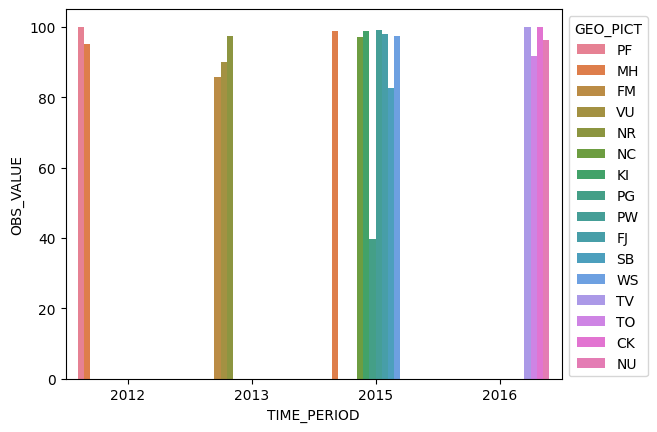

In [9]:
ax = sns.barplot(
    data=avail_water_df,
    x="TIME_PERIOD",
    y="OBS_VALUE",
    hue="GEO_PICT"
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

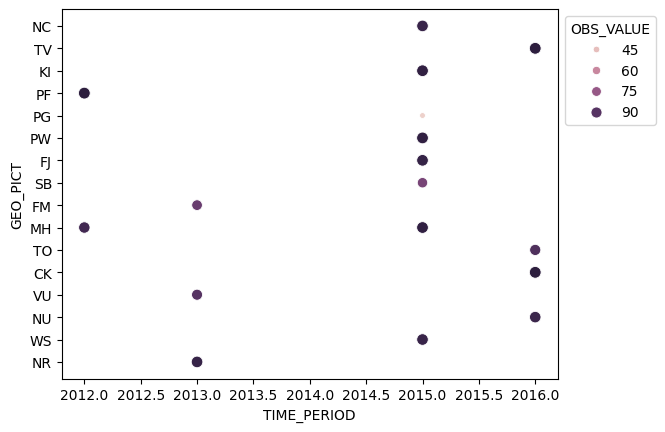

In [10]:
ax = sns.scatterplot(
    data=avail_water_df,
    x="TIME_PERIOD",
    y="GEO_PICT",
    hue="OBS_VALUE",
    size="OBS_VALUE"
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Healthcare Worker Density

In [11]:
health_care_df_10000.head(10)

,INDICATOR,COMPOSITE_BREAKDOWN,GEO_PICT,SEX,AGE,URBANIZATION,INCOME,OCCUPATION,REPORTING_TYPE,NATURE,TIME_PERIOD,OBS_VALUE,UNIT_MEASURE
177,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,221,G,_X,2001,9.21,PER_10000_POP
178,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,221,G,_X,2004,13.25,PER_10000_POP
179,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,221,G,_X,2009,14.55,PER_10000_POP
180,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,221,G,_X,2014,14.29,PER_10000_POP
181,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,221,G,_X,2019,14.29,PER_10000_POP
182,SH_MED_DEN,_Z,CK,_T,_T,_T,_T,221,G,_X,2020,16.67,PER_10000_POP
352,SH_MED_DEN,_Z,TV,_T,_T,_T,_T,2261,G,_X,2002,2.08,PER_10000_POP
353,SH_MED_DEN,_Z,TV,_T,_T,_T,_T,2261,G,_X,2003,2.06,PER_10000_POP
354,SH_MED_DEN,_Z,TV,_T,_T,_T,_T,2261,G,_X,2008,1.94,PER_10000_POP
355,SH_MED_DEN,_Z,TV,_T,_T,_T,_T,2261,G,_X,2014,4.55,PER_10000_POP


In [12]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    sns.heatmap(d, **kwargs, xticklabels=True, yticklabels=True)

def normalize(df, feature_name):
    max_value = df[feature_name].max()
    min_value = df[feature_name].min()
    return (df[feature_name] - min_value) / (max_value - min_value)

occ_map = {
    "221": "Medical Doctors",
    "2261": "Dentists",
    "222": "Nursing and Midwifery Professionals",
    "2221": "Nursing and Midwifery Professionals",
    "2262": "Pharmacists",
    "2222": "Nursing and Midwifery Professionals"
}

In [13]:
data = health_care_df_10000[health_care_df_10000["TIME_PERIOD"] >= 2010][["GEO_PICT","OCCUPATION","TIME_PERIOD","OBS_VALUE"]]
data = data.replace({"OCCUPATION": occ_map})

geo = pd.unique(data["GEO_PICT"])
occ = pd.unique(data["OCCUPATION"])
year = pd.unique(data["TIME_PERIOD"])

mi = pd.MultiIndex.from_product([geo, occ, year])
grouped = data.groupby(["GEO_PICT", "OCCUPATION", "TIME_PERIOD"])["OBS_VALUE"].sum()
data = grouped \
    .reindex(mi, fill_value=pd.NA) \
    .to_frame() \
    .reset_index() \
    .rename(
        columns={
            "level_0": "GEO_PICT", 
            "level_1": "OCCUPATION", 
            "level_2": "TIME_PERIOD"
        }
    )
data["NORMALIZED_OBS"] = normalize(df, "OBS_VALUE")

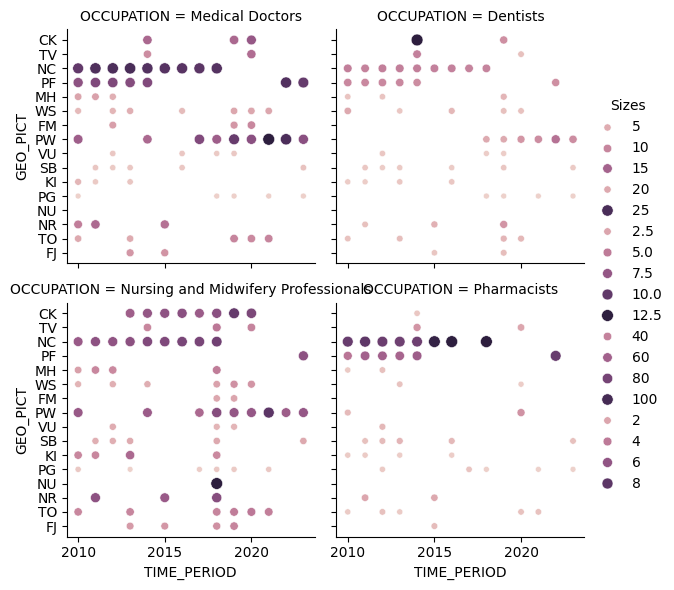

In [14]:
# # Multi-heatmap option
# g = sns.FacetGrid(data, col="OCCUPATION", col_wrap = 1)
# g.map_dataframe(draw_heatmap, "TIME_PERIOD", "GEO_PICT", "NORMALIZED_OBS")

g = sns.FacetGrid(data, col="OCCUPATION", col_wrap = 2)
g.map_dataframe(
    sns.scatterplot, 
    x="TIME_PERIOD", 
    y="GEO_PICT",
    hue="OBS_VALUE",
    size="OBS_VALUE"
)
g.add_legend(title='Sizes')

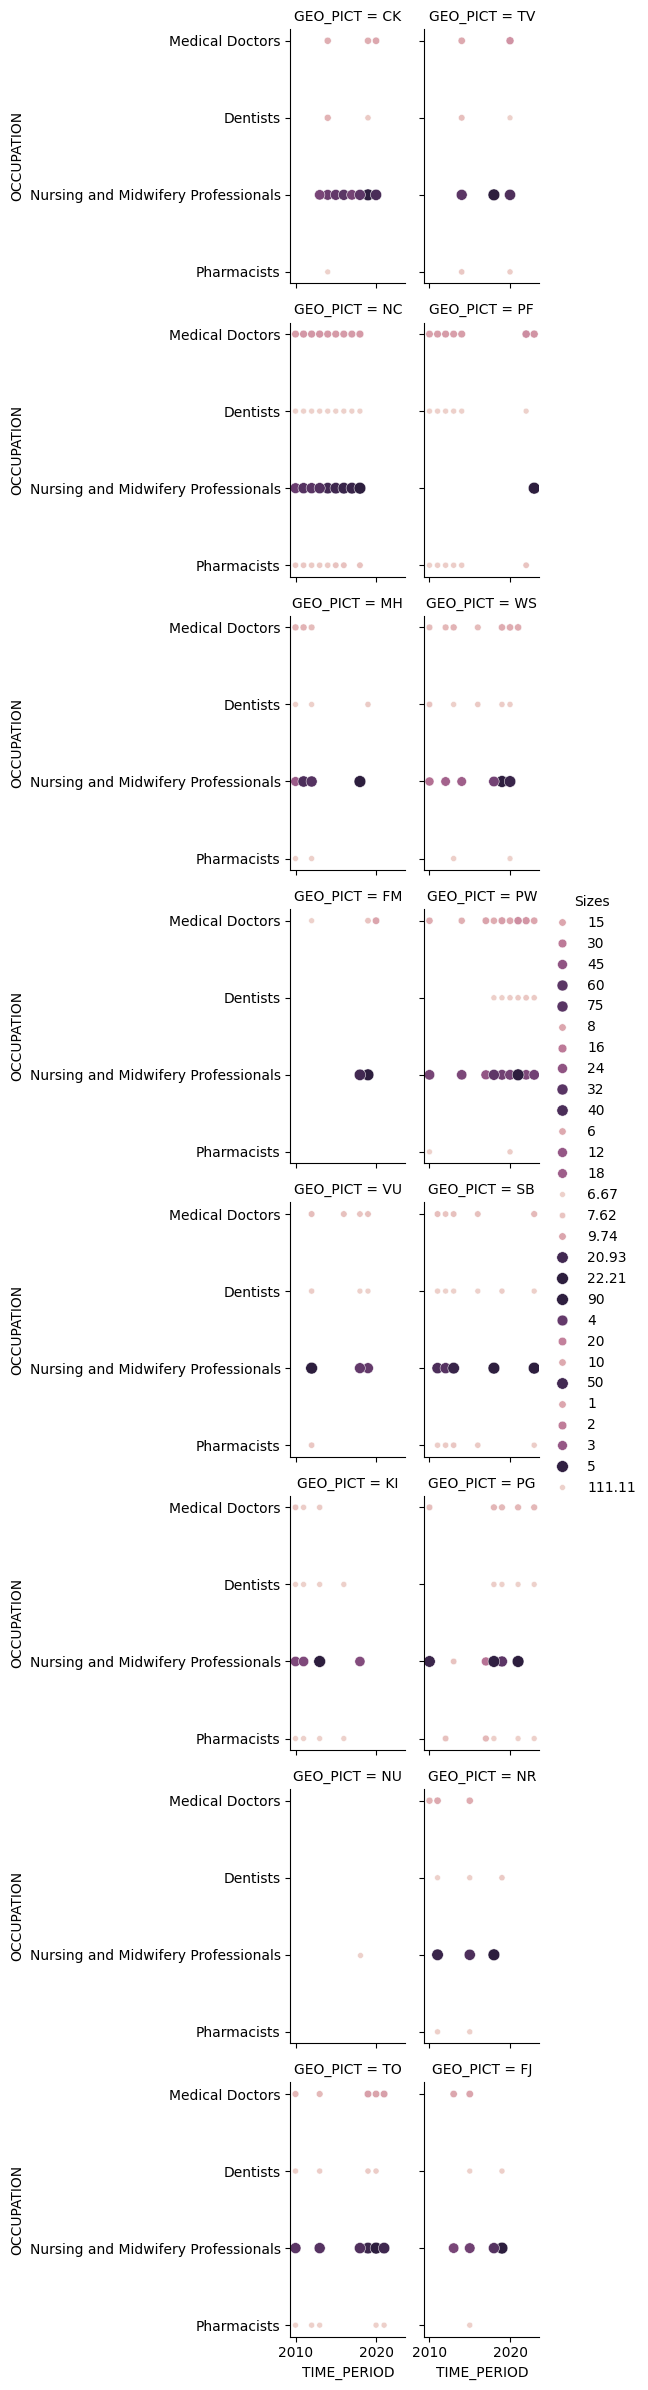

In [15]:
# # Multi-heatmap option
# g = sns.FacetGrid(data, col="OCCUPATION", col_wrap = 1)
# g.map_dataframe(draw_heatmap, "TIME_PERIOD", "GEO_PICT", "NORMALIZED_OBS")

g = sns.FacetGrid(data, col="GEO_PICT", col_wrap = 2)
g.map_dataframe(
    sns.scatterplot, 
    x="TIME_PERIOD", 
    y="OCCUPATION",
    hue="OBS_VALUE",
    size="OBS_VALUE"
)
g.add_legend(title='Sizes')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 


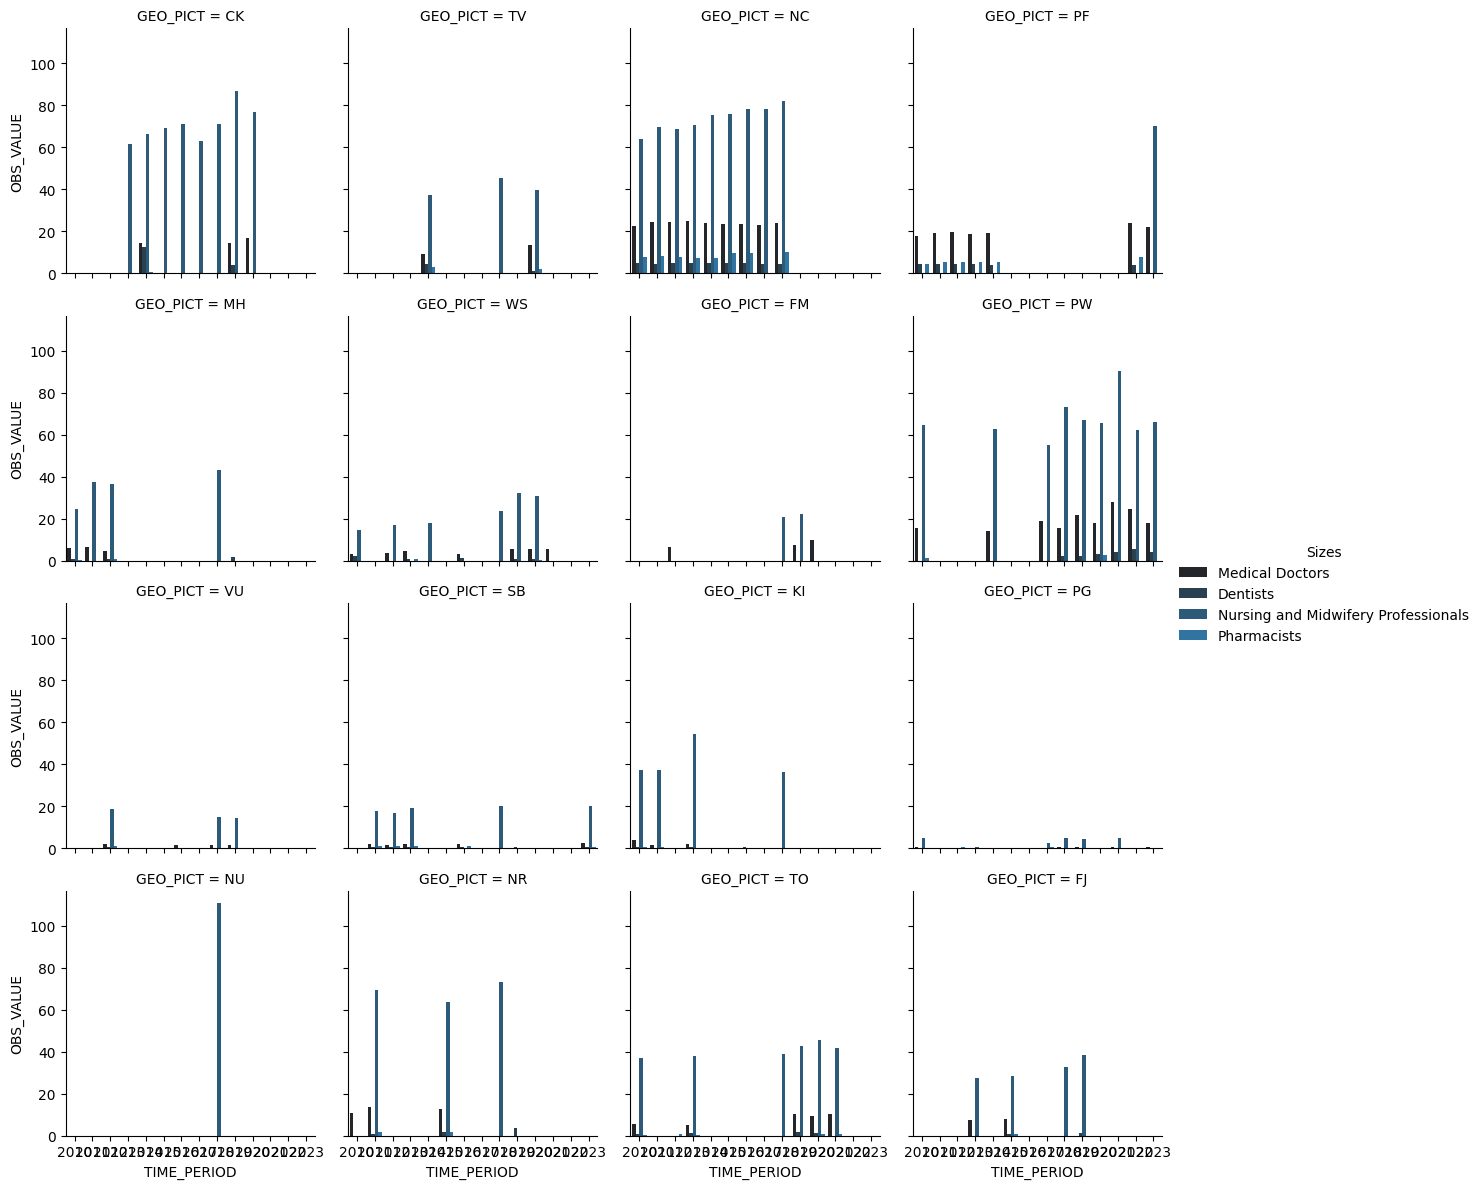

In [16]:
g = sns.FacetGrid(data, col="GEO_PICT", col_wrap = 4)
g.map_dataframe(
    sns.barplot, 
    x="TIME_PERIOD", 
    y="OBS_VALUE",
    hue="OCCUPATION"
)
g.add_legend(title='Sizes')

## Mortality Rate attributed to unsafe water, unsafe sanitation, and lack of hyegeine

In [17]:
mort_df.head(5)

,INDICATOR,COMPOSITE_BREAKDOWN,GEO_PICT,SEX,AGE,URBANIZATION,INCOME,OCCUPATION,REPORTING_TYPE,NATURE,TIME_PERIOD,OBS_VALUE,UNIT_MEASURE
623,SH_STA_WASH,_Z,PW,_T,_T,_T,_T,_T,G,E,2012,4.80,PER_100000_POP
776,SH_STA_WASH,_Z,PG,F,_T,_T,_T,_T,G,_X,2016,18.05,PER_100000_POP
777,SH_STA_WASH,_Z,PG,F,_T,_T,_T,_T,G,_X,2019,21.80,PER_100000_POP
1348,SH_STA_WASH,_Z,SB,F,_T,_T,_T,_T,G,_X,2016,5.49,PER_100000_POP
1349,SH_STA_WASH,_Z,SB,F,_T,_T,_T,_T,G,_X,2019,34.70,PER_100000_POP


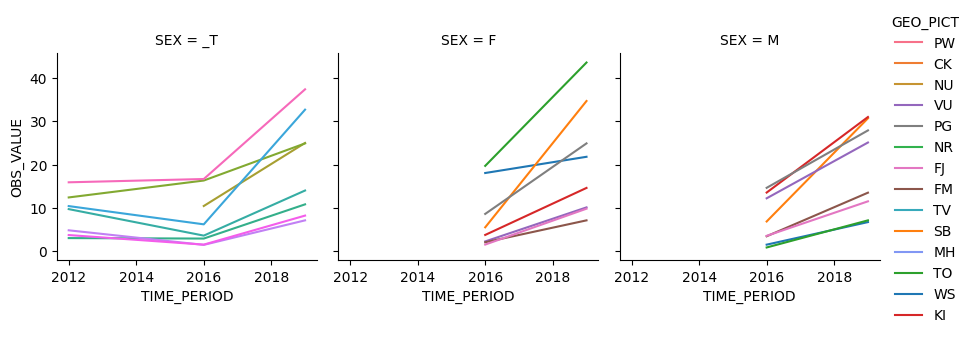

In [18]:
g = sns.FacetGrid(mort_df, col="SEX")
g.map_dataframe(
    sns.lineplot, 
    x="TIME_PERIOD",
    y="OBS_VALUE",
    hue="GEO_PICT",
    markers=True
)
g.add_legend(title='GEO_PICT')

## Healthy food policies in schools

In [19]:
food_pol_df.head(5)

,INDICATOR,COMPOSITE_BREAKDOWN,GEO_PICT,SEX,AGE,URBANIZATION,INCOME,OCCUPATION,REPORTING_TYPE,NATURE,TIME_PERIOD,OBS_VALUE,UNIT_MEASURE
717,BPI_MANAF5,_Z,NR,_T,_T,_T,_T,_T,R,C,2017,1.0,N
718,BPI_MANAF5,_Z,NR,_T,_T,_T,_T,_T,R,C,2019,5.0,N
719,BPI_MANAF5,_Z,NR,_T,_T,_T,_T,_T,R,C,2021,5.0,N
1073,BPI_MANAF5,_Z,PG,_T,_T,_T,_T,_T,R,C,2017,1.0,N
1074,BPI_MANAF5,_Z,PG,_T,_T,_T,_T,_T,R,C,2019,3.0,N


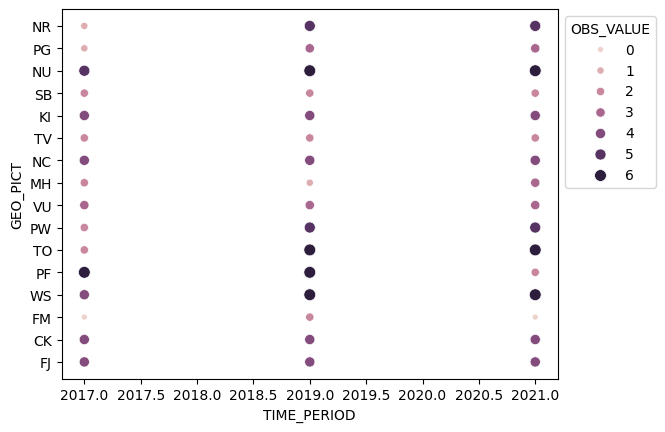

In [20]:
ax = sns.scatterplot(
    data=food_pol_df,
    x="TIME_PERIOD",
    y="GEO_PICT",
    hue="OBS_VALUE",
    size="OBS_VALUE"
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Proportion of schools with access to basic drinking water

In [21]:
school_h20_access_df.head(5).sort_values(by=["GEO_PICT","TIME_PERIOD","REPORTING_TYPE"])

,INDICATOR,COMPOSITE_BREAKDOWN,GEO_PICT,SEX,AGE,URBANIZATION,INCOME,OCCUPATION,REPORTING_TYPE,NATURE,TIME_PERIOD,OBS_VALUE,UNIT_MEASURE
377,SE_ACS_H2O,PRIMARY_ALL,CK,_T,_T,_T,_T,_T,R,C,2018,100.0,PERCENT
378,SE_ACS_H2O,PRIMARY_ALL,CK,_T,_T,_T,_T,_T,R,C,2019,100.0,PERCENT
379,SE_ACS_H2O,PRIMARY_ALL,CK,_T,_T,_T,_T,_T,R,C,2020,100.0,PERCENT
380,SE_ACS_H2O,PRIMARY_ALL,CK,_T,_T,_T,_T,_T,R,C,2021,100.0,PERCENT
381,SE_ACS_H2O,PRIMARY_ALL,CK,_T,_T,_T,_T,_T,R,C,2022,100.0,PERCENT


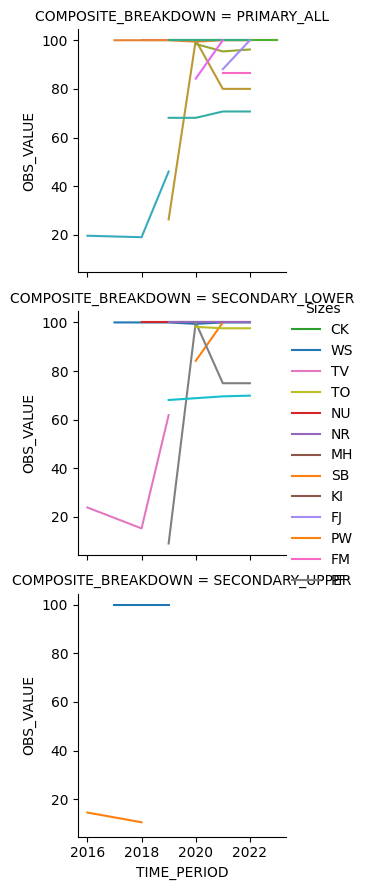

In [22]:
g = sns.FacetGrid(
    school_h20_access_df[school_h20_access_df["COMPOSITE_BREAKDOWN"] != "_Z"], 
    col="COMPOSITE_BREAKDOWN", 
    col_wrap = 1
)
g.map_dataframe(
    sns.lineplot, 
    x="TIME_PERIOD",
    y="OBS_VALUE",
    hue="GEO_PICT"
)
g.add_legend(title='Sizes')

## Proportion of population using safely managed sanitation services

In [23]:
san_serv_df.head(5)

,INDICATOR,COMPOSITE_BREAKDOWN,GEO_PICT,SEX,AGE,URBANIZATION,INCOME,OCCUPATION,REPORTING_TYPE,NATURE,TIME_PERIOD,OBS_VALUE,UNIT_MEASURE
2467,SH_SAN_SAFE,_Z,TO,_T,_T,_T,_T,_T,G,_X,2000,34.15,PERCENT
2468,SH_SAN_SAFE,_Z,TO,_T,_T,_T,_T,_T,G,_X,2001,34.14,PERCENT
2469,SH_SAN_SAFE,_Z,TO,_T,_T,_T,_T,_T,G,_X,2002,34.14,PERCENT
2470,SH_SAN_SAFE,_Z,TO,_T,_T,_T,_T,_T,G,_X,2003,34.14,PERCENT
2471,SH_SAN_SAFE,_Z,TO,_T,_T,_T,_T,_T,G,_X,2004,34.14,PERCENT


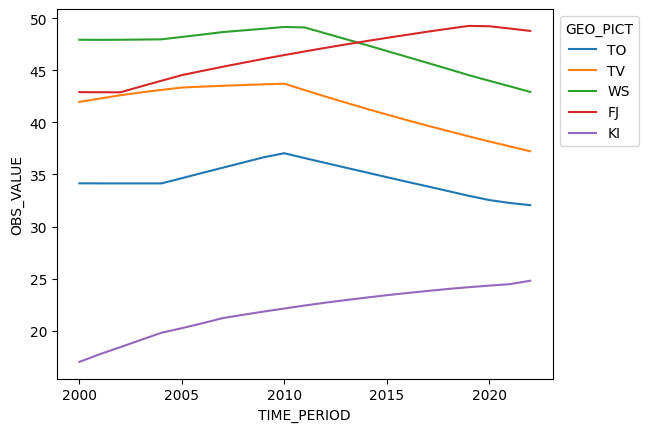

In [24]:
ax = sns.lineplot(
    data=san_serv_df,
    x="TIME_PERIOD",
    y="OBS_VALUE",
    hue="GEO_PICT",
    markers=True
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Proportion of wastewater safely treated

In [25]:
waste_water_df.sort_values(by=["GEO_PICT","OBS_VALUE"]).head(5)

,INDICATOR,COMPOSITE_BREAKDOWN,GEO_PICT,SEX,AGE,URBANIZATION,INCOME,OCCUPATION,REPORTING_TYPE,NATURE,TIME_PERIOD,OBS_VALUE,UNIT_MEASURE
3474,SPC_6_3_1,_Z,FJ,_T,_T,_T,_T,_T,G,C,2014,36.0,PERCENT
7265,SPC_6_3_1,_Z,KI,_T,_T,_T,_T,_T,G,E,2020,30.8,PERCENT
2526,SPC_6_3_1,_Z,TO,_T,_T,_T,_T,_T,G,E,2020,28.6,PERCENT
2525,SPC_6_3_1,_Z,TO,_T,_T,_T,_T,_T,N,C,2015,99.5,PERCENT
5671,SPC_6_3_1,_Z,TV,_T,_T,_T,_T,_T,G,E,2020,2.0,PERCENT


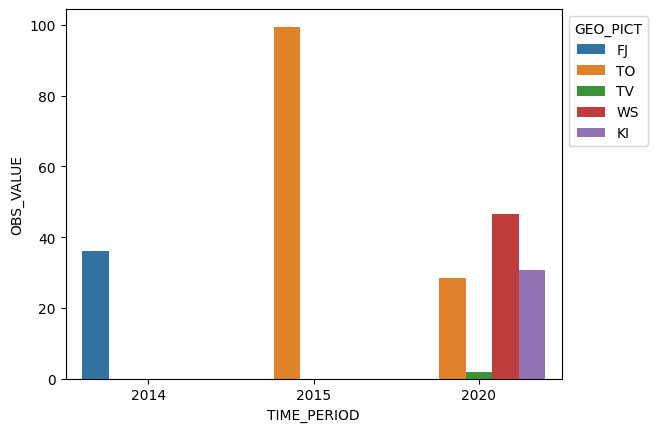

In [26]:
ax = sns.barplot(
    data=waste_water_df,
    x="TIME_PERIOD",
    y="OBS_VALUE",
    hue="GEO_PICT"
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Coverage of essential health services

In [27]:
ess_hlth_df.sort_values(by=["GEO_PICT","OBS_VALUE"]).head(5)

,INDICATOR,COMPOSITE_BREAKDOWN,GEO_PICT,SEX,AGE,URBANIZATION,INCOME,OCCUPATION,REPORTING_TYPE,NATURE,TIME_PERIOD,OBS_VALUE,UNIT_MEASURE
5308,SPC_3_8_1,_Z,CK,_T,_T,_T,_T,_T,G,_X,2021,45.98,INDEX
5302,SPC_3_8_1,_Z,CK,_T,_T,_T,_T,_T,G,_X,2000,47.39,INDEX
5303,SPC_3_8_1,_Z,CK,_T,_T,_T,_T,_T,G,_X,2005,50.17,INDEX
5304,SPC_3_8_1,_Z,CK,_T,_T,_T,_T,_T,G,_X,2010,60.71,INDEX
5306,SPC_3_8_1,_Z,CK,_T,_T,_T,_T,_T,G,_X,2017,62.52,INDEX


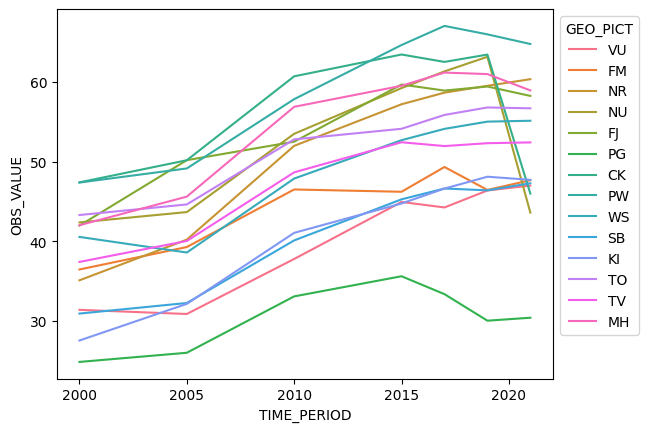

In [28]:
ax = sns.lineplot(
    data=ess_hlth_df,
    x="TIME_PERIOD",
    y="OBS_VALUE",
    hue="GEO_PICT"
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))